In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
'''
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'malicious-urls-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1486586%2F2456026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T044022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d7598b150658e7dd4ce308c927413193dca88a01009ae19491817639ec3a9cfd06ba1ffc4f6bad2e60cb67eb5c47c65dec2291ac0bfc3be17927f8b36f9caf49ab5f1b60f7405cc07e3ca8ed0011ad68d27b086e95238be835114d4b90c4937a252b6428d300821984645de9a3d99c2f45a533661f27e8b3415994fae695a70728a2c2981a15524d536b592db133972cf66247ee29b4bf32b744a338e13ec16482e6d4248cda708e728411dc9a4ccdbea46a73336f172c189371e7edf10fe71956cacefd0280977fd5f915715b615a7b4a32664b44bf55ad471831e41de6d238d92dba97d6427b5b0bcfc1638e54186bc4205ab292756a790829579328311a4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')
'''

'\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'malicious-urls-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1486586%2F2456026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T044022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d7598b150658e7dd4ce308c927413193dca88a01009ae19491817639ec3a9cfd06ba1ffc4f6bad2e60cb67eb5c47c65dec2291ac0bfc3be17927f8b36f9caf49ab5f1b60f7405cc07e3ca8ed0011ad68d27b086e95238be835114d4b90c4937a252b6428d300821984645de9a3d99c2f45a533661f27e8b3415994fae695a70728a2c2981a15524d536b592db133972cf66247ee29b4bf32b744a338e13ec16482e6d4248cda708e728411dc9a4ccdbea46a73336f172c189371e7edf10fe71956cacefd0280977fd5f915715b615a7b4a32664b44bf55ad471831e41de6d238d92dba97d6427b5b0bcfc1638e54186bc4205ab292756a790829579328311a4\'\n\nKAGGLE_INPUT_PATH=\'/kaggle/input\

In [ ]:
!pip install python-whois

In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os
import seaborn as sns
import sys
import tarfile
import shutil

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:

 from google.colab import drive
 drive.mount('/content/drive')

 import os
 print(os.listdir('/content/drive/MyDrive/Colab Notebooks/malicious URL dataset'))

# import os
# print(os.listdir('/kaggle/input/'))

# Define the file path
 file_path = '/content/drive/MyDrive/Colab Notebooks/malicious URL dataset/malicious_phish.csv'

'''
import os
print(os.listdir('C:/Users/wku/Desktop/project/dataset/'))

# Define the file path
file_path = 'C:/Users/wku/Desktop/project/dataset/malicious_phish.csv'
'''
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['malicious_phish.csv']
(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
# Count the number of values for each 'type'
type_counts = df.type.value_counts()
df.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

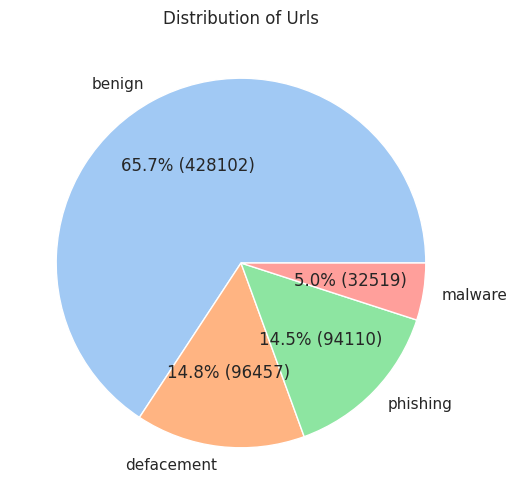

In [ ]:
# Assuming you have type_counts as a pandas Series containing the count of each type
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct=lambda p: '{:.1f}% ({:d})'.format(p, int(p/100*sum(type_counts))), colors=sns.color_palette("pastel"))
plt.title('Distribution of Urls')
# Save the plot as a PDF
plt.savefig('Distribution of Urls.pdf', format='pdf')
plt.show()

## Feature Engineering

In [ ]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
# df['use_of_ip'] = df['use_of_ip'].astype(str)

In [ ]:
import pandas as pd

# 假设df是您的DataFrame
counts = df.groupby(['type', 'use_of_ip']).size().unstack(fill_value=0)

# 打印每个类型及其是否有IP地址的计数
print(counts)

use_of_ip        0     1
type                    
benign      428014    89
defacement   96457     0
malware      25650  6870
phishing     93777   334


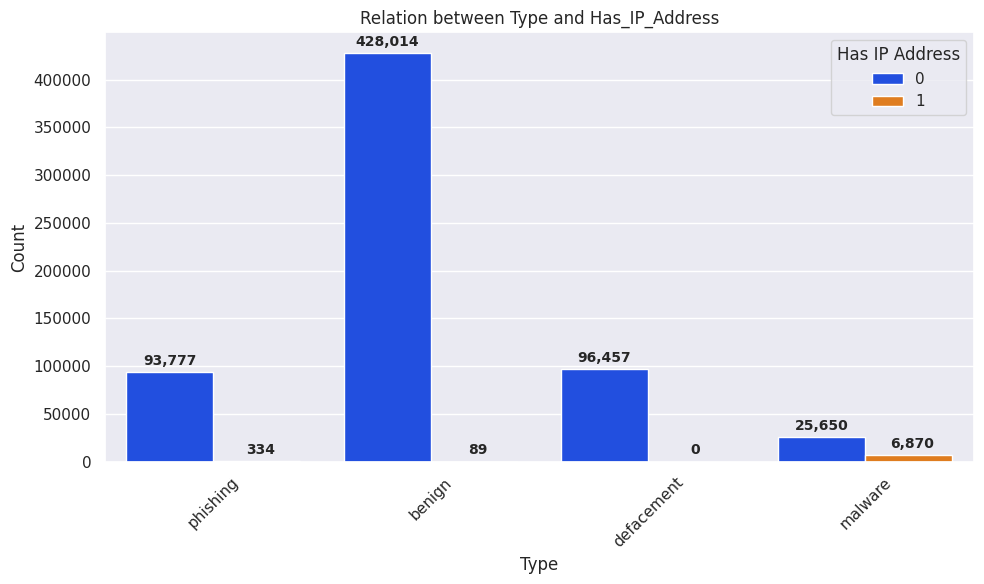

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='type', hue='use_of_ip', palette='bright')

# Add count annotations
for i, type in enumerate(df['type'].unique()):
    for j, use_of_ip in enumerate(df['use_of_ip'].unique()):
        height = df.loc[(df['type'] == type) & (df['use_of_ip'] == use_of_ip), 'use_of_ip'].value_counts().get(use_of_ip, 0)
        ax.annotate(format(int(height), ','),
                    (i + j/2.4 - 0.2, height),
                    ha='center', va='bottom',
                    xytext=(0, 3), textcoords="offset points",
                    fontsize=10, fontweight='bold')

plt.title("Relation between Type and Has_IP_Address")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has IP Address")
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Relation between Type and Has_IP_Address.pdf', format='pdf')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [ ]:
from urllib.parse import urlparse




def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

<ipython-input-104-4a390ae97ef1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='abnormal_url', data=df, palette="bright", ax=ax)


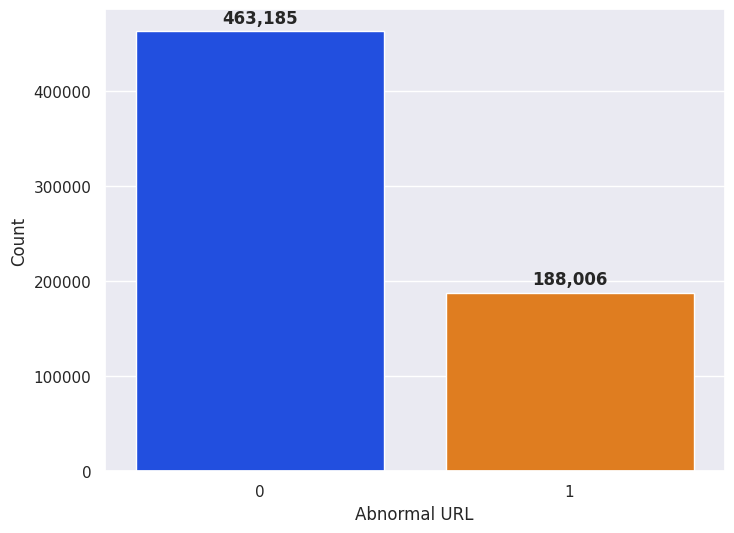

In [ ]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='abnormal_url', data=df, palette="bright", ax=ax)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:,.0f}",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords="offset points",
                fontsize=12,
                fontweight='bold')

plt.xlabel('Abnormal URL')
plt.ylabel('Count')

# Save the plot as a PDF
plt.savefig('Counting Abnormal URLs.pdf', format='pdf')
plt.show()

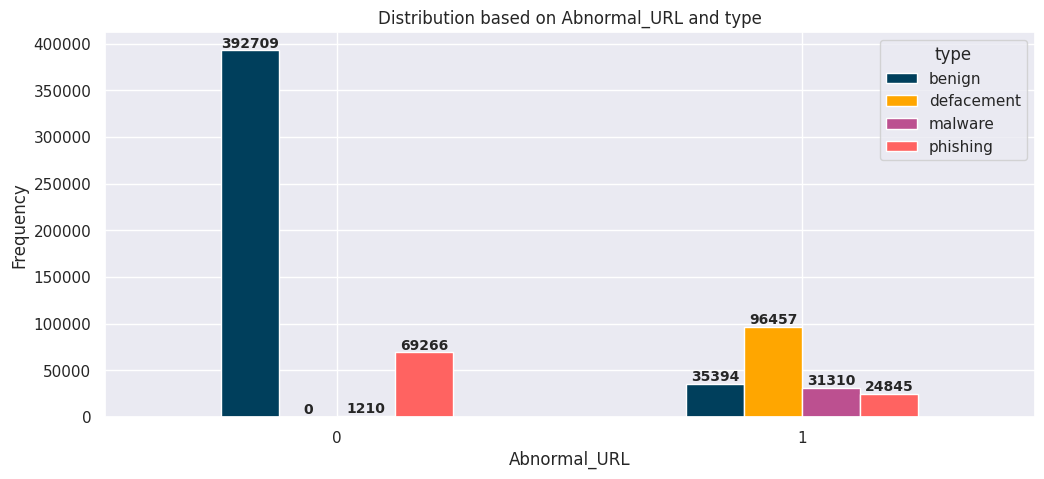

In [ ]:
# Create a crosstab
crosstab = pd.crosstab(df["abnormal_url"], df["type"])

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 5))
crosstab.plot(kind="bar", ax=ax, color=['#003f5c','#ffa600','#bc5090','#ff6361'])

# Add value labels to the bars
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.5, f"{height:.0f}",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Distribution based on Abnormal_URL and type')
plt.xlabel('Abnormal_URL')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(title="type")

# Save the plot as a PDF
plt.savefig('Distribution based on Abnormal_URL and type.pdf', format='pdf')
plt.show()

In [ ]:
!pip install googlesearch-python

In [ ]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,use_of_ip,type_code,abnormal_url,count.
0,br-icloud.com.br,phishing,0,3,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [ ]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
# df['short_url'] = df['short_url'].astype(str)

In [ ]:
# 假设df是您的DataFrame
counts_shortening = df.groupby(['type', 'short_url']).size().unstack(fill_value=0)

# 打印每个类型及其是否有IP地址的计数
print(counts_shortening)

short_url        0      1
type                     
benign      398492  29611
defacement   93856   2601
malware      31813    707
phishing     87275   6836


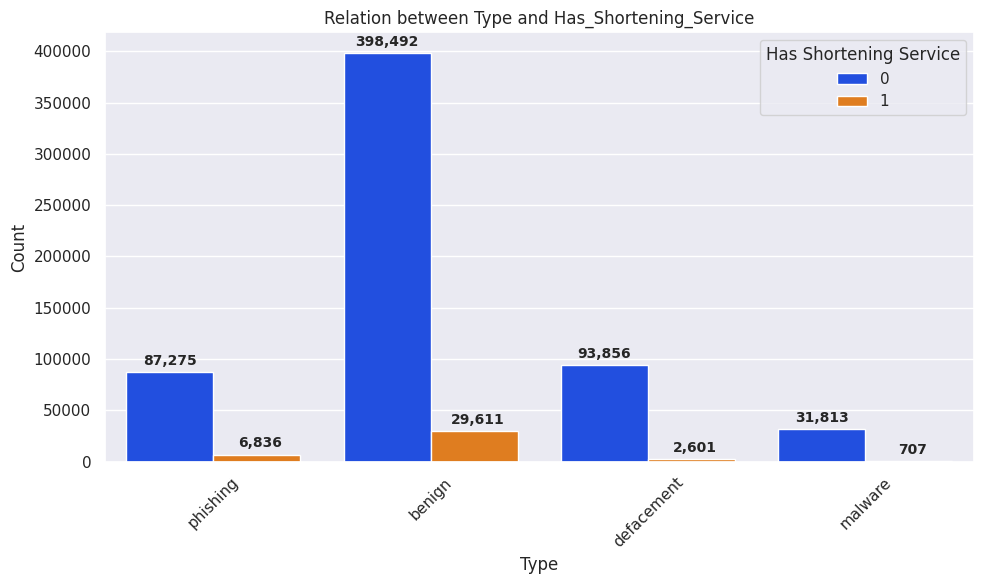

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='type', hue='short_url', palette='bright')
plt.title("Relation between Type and Has_Shortening_Service")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Shortening Service")

# Add count annotations
for i, type in enumerate(df['type'].unique()):
    for j, short_url in enumerate(df['short_url'].unique()):
        height = df.loc[(df['type'] == type) & (df['short_url'] == short_url), 'short_url'].value_counts().get(short_url, 0)
        ax.annotate(format(int(height), ','),
                    (i + j/2.4 - 0.2, height),
                    ha='center', va='bottom',
                    xytext=(0, 3), textcoords="offset points",
                    fontsize=10, fontweight='bold')

plt.tight_layout()
# Save the plot as a PDF
plt.savefig('Relation between Type and Has_Shortening_Service.pdf', format='pdf')
plt.show()

In [ ]:
# Function to detect if the URL has "https"
def has_https(url):
    return int("https" in url)

# Add a new 'Has_HTTPS' column with 1 if there's "https", 0 otherwise
df['count-https'] = df['url'].apply(has_https)

# df['count-https'] = df['count-https'].astype(str)
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

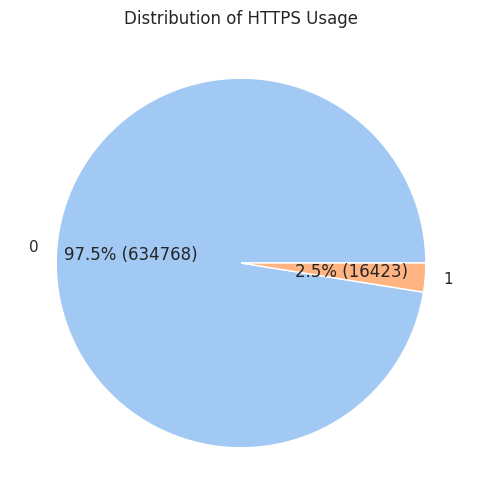

In [ ]:
# Count the occurrences of each value in the "Has_HTTPS" column
https_counts = df['count-https'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(https_counts, labels=https_counts.index, autopct=lambda p: '{:.1f}% ({:d})'.format(p, int(p/100*sum(type_counts))), colors=sns.color_palette("pastel"))
plt.title('Distribution of HTTPS Usage')
# Save the plot as a PDF
plt.savefig('Distribution of HTTPS Usage.pdf', format='pdf')
plt.show()

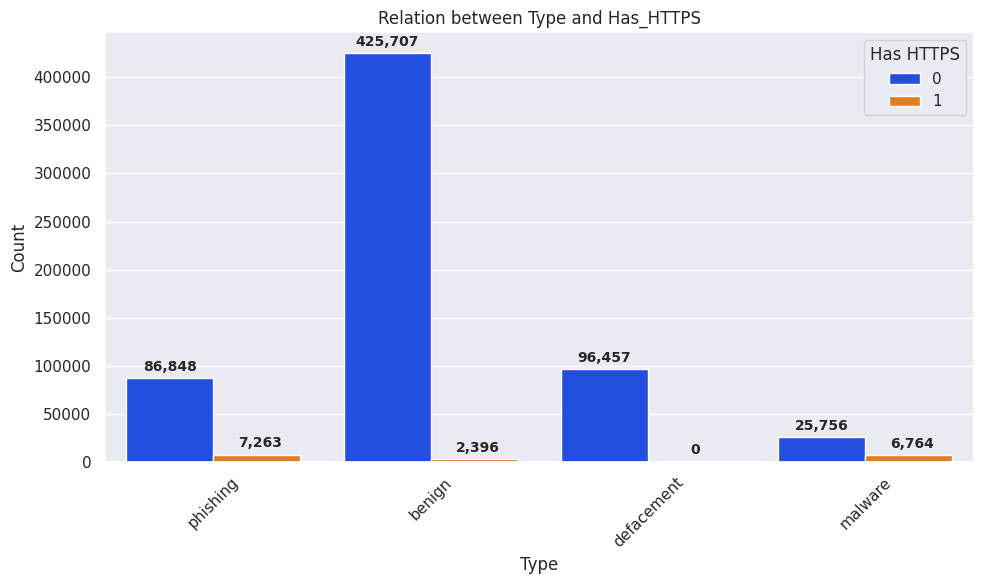

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='type', hue='count-https',palette="bright")
plt.title("Relation between Type and Has_HTTPS")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has HTTPS")

# Add count annotations
for i, type in enumerate(df['type'].unique()):
    for j, count_https in enumerate(df['count-https'].unique()):
        height = df.loc[(df['type'] == type) & (df['count-https'] == count_https), 'count-https'].value_counts().get(count_https, 0)
        ax.annotate(format(int(height), ','),
                    (i + j/2.4 - 0.2, height),
                    ha='center', va='bottom',
                    xytext=(0, 3), textcoords="offset points",
                    fontsize=10, fontweight='bold')

plt.tight_layout()
# Save the plot as a PDF
plt.savefig('Relation between Type and Has_HTTPS.pdf', format='pdf')
plt.show()

In [ ]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,url,type,use_of_ip,type_code,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,3,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


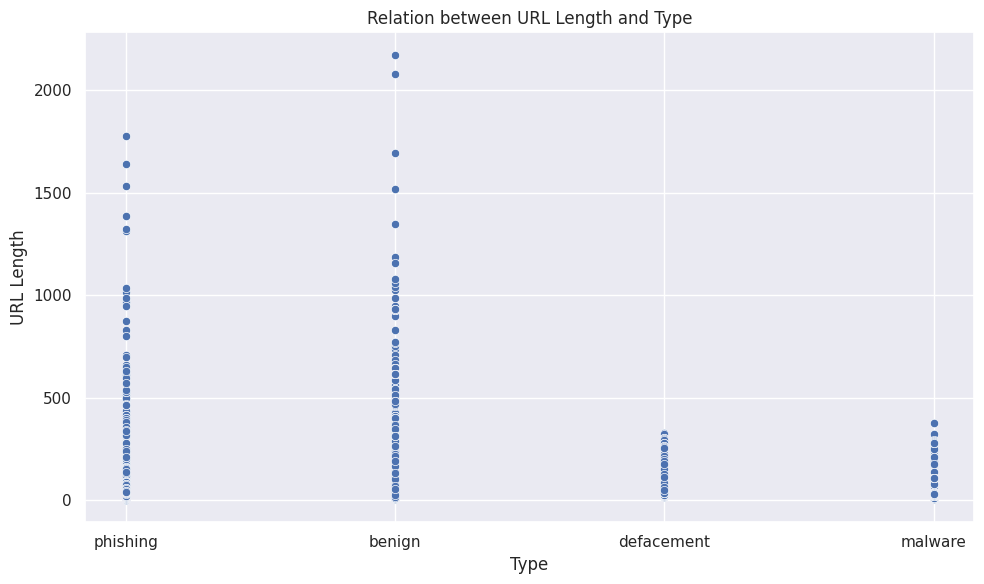

In [ ]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='type', y='url_length')
plt.title("Relation between URL Length and Type")
plt.xlabel("Type")
plt.ylabel("URL Length")
# Save the plot as a PDF
plt.savefig('Relation between URL Length and Type (scatter chart).pdf', format='pdf', dpi=300)
plt.tight_layout()
plt.show()

<ipython-input-121-c43eb88f0d6f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='type', y='url_length', palette="bright", ci=None)
<ipython-input-121-c43eb88f0d6f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='type', y='url_length', palette="bright", ci=None)


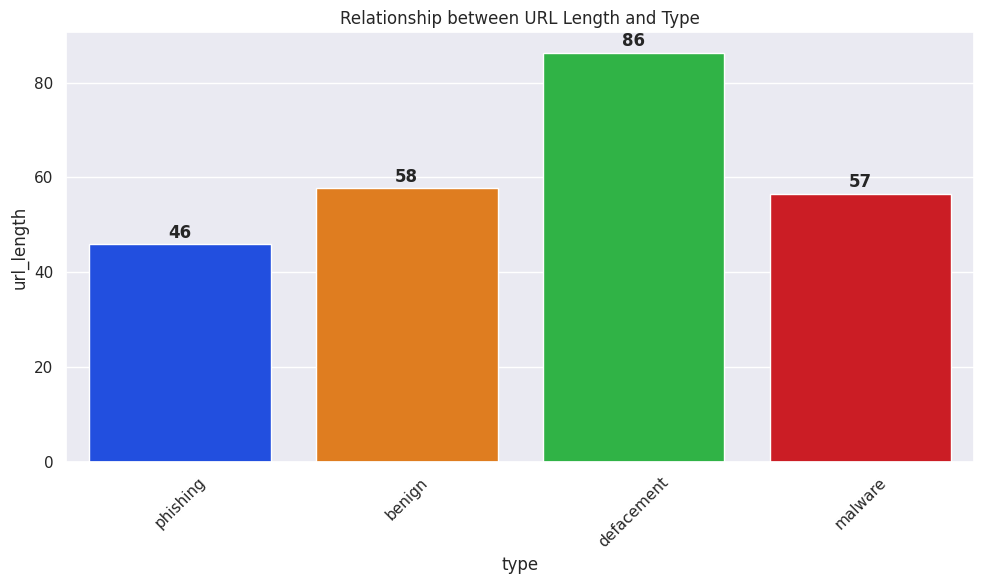

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='type', y='url_length', palette="bright", ci=None)
plt.title("Relationship between URL Length and Type")
plt.xticks(rotation=45)

# Add count annotations
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.5, f"{height:.0f}",
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
# Save the plot as a PDF
plt.savefig('Relationship between URL Length and Type.pdf', format='pdf')
plt.show()

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [ ]:
df.head()

,url,type,use_of_ip,type_code,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url
0,br-icloud.com.br,phishing,0,3,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0


In [ ]:

!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

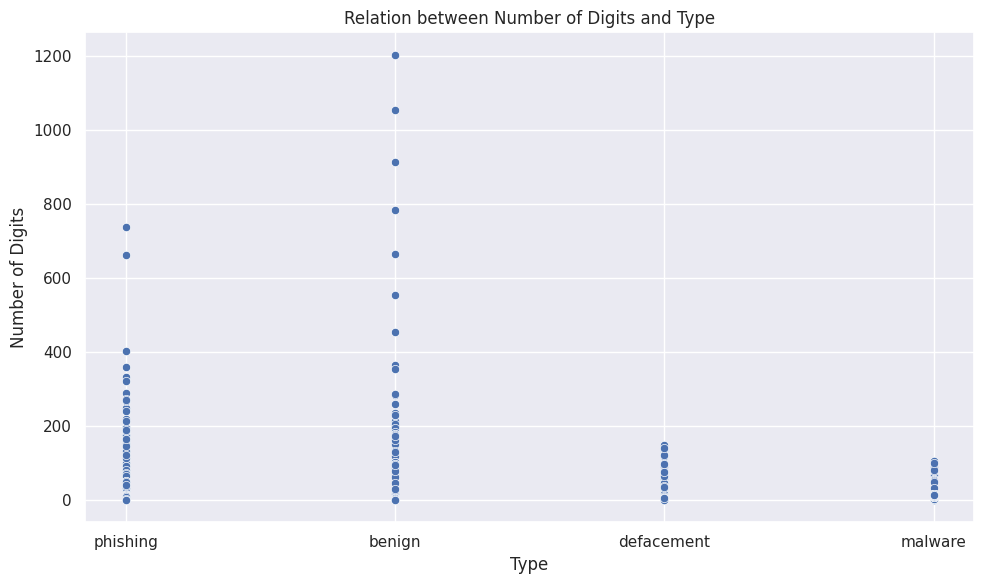

In [ ]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='type', y='count-digits')
plt.title("Relation between Number of Digits and Type")
plt.xlabel("Type")
plt.ylabel("Number of Digits")
# Save the plot as a PDF
plt.savefig('Relation between Number of Digits and Type.pdf', format='pdf')
plt.tight_layout()
plt.show()

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

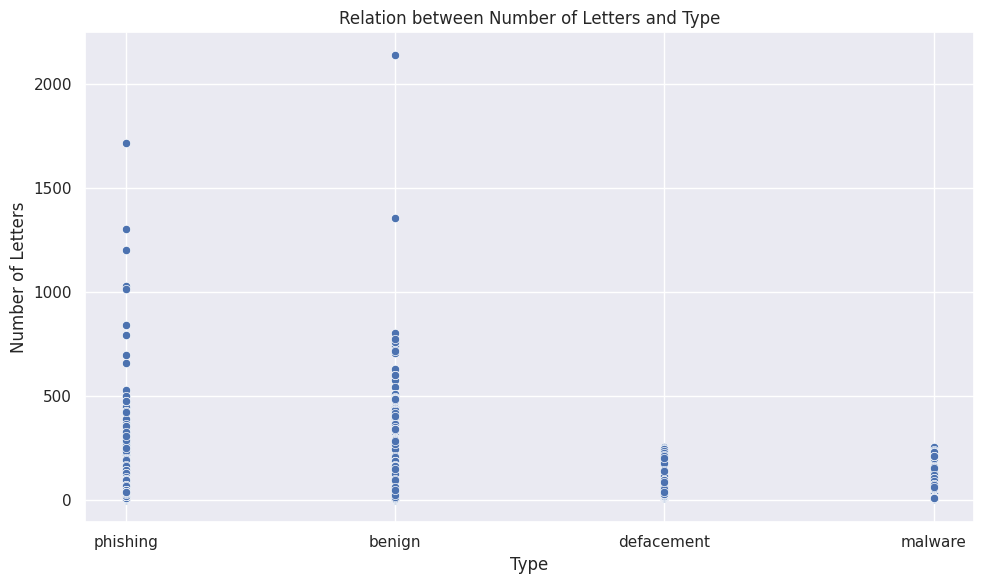

In [ ]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='type', y='count-letters')
plt.title("Relation between Number of Letters and Type")
plt.xlabel("Type")
plt.ylabel("Number of Letters")
# Save the plot as a PDF
plt.savefig('Relation between Number of Letters and Type.pdf', format='pdf')
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns="tld")

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()
'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlb_make = LabelEncoder()\ndf["type_code"] = lb_make.fit_transform(df["type"])\ndf["type_code"].value_counts()\n'

In [ ]:
#Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

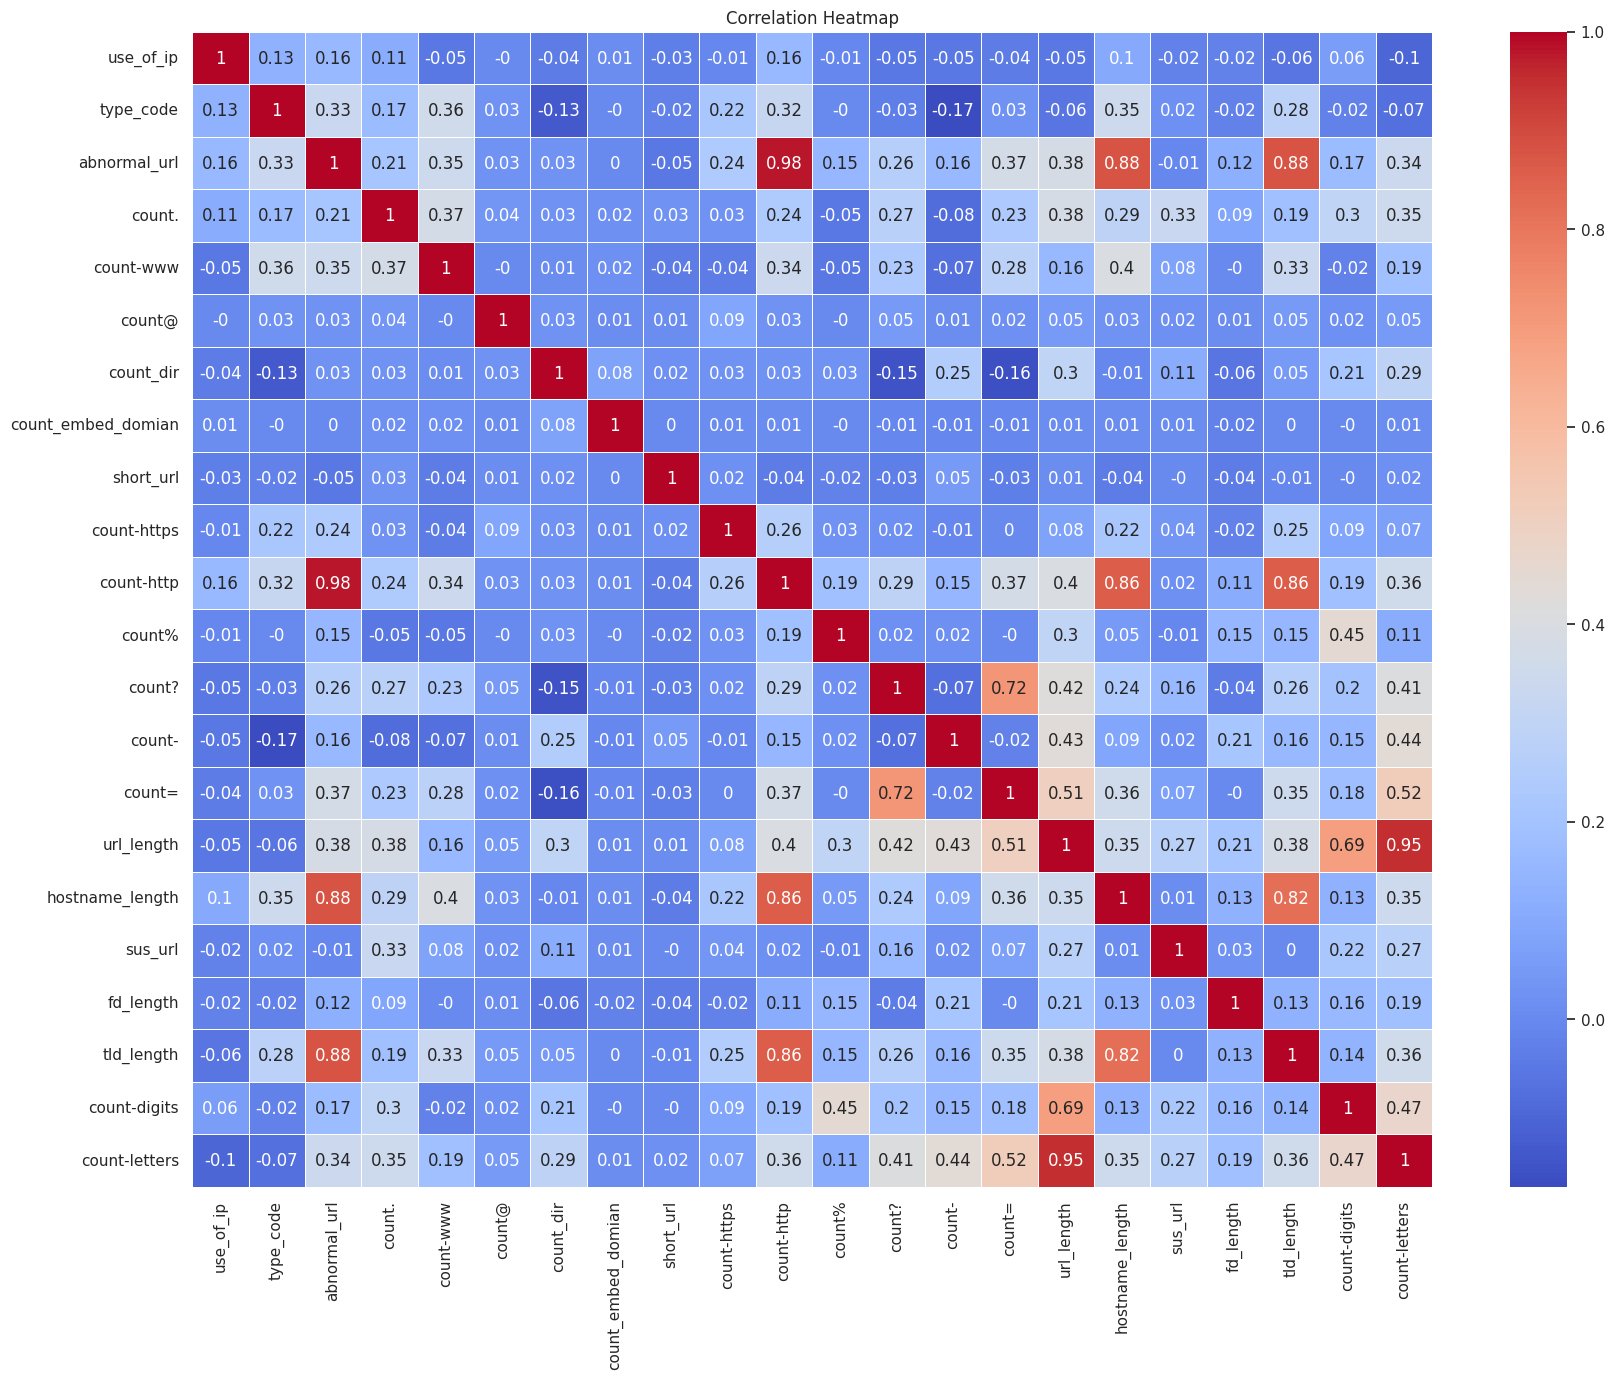

In [ ]:
# 从原始数据框（DataFrame）data中选择只包含数值类型（如整数、浮点数等）的列
data = df.select_dtypes(include=[np.number])

# Calculate correlations between columns
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
# Save the plot as a PDF
plt.savefig('Correlation Heatmap.pdf', format='pdf')
plt.show()

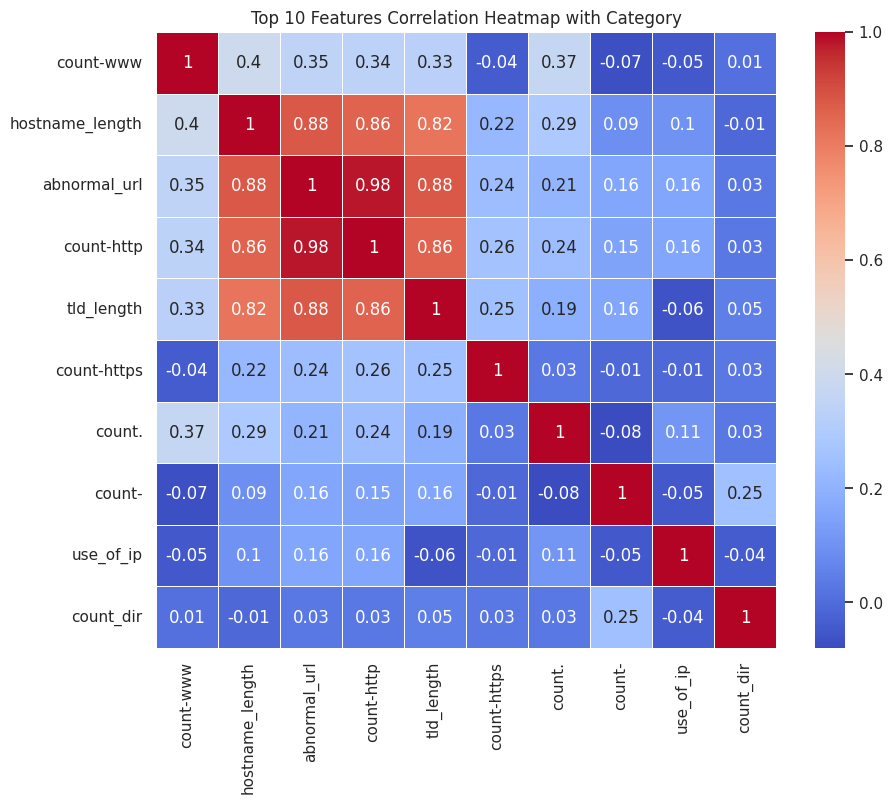

In [ ]:
# Select the top 10 features related to the "Category" column
top_features = data.corr().abs()['type_code'].sort_values(ascending=False)[1:11].index

# Calculate correlations for the selected features
correlation_matrix = data[top_features].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Top 10 Features Correlation Heatmap with Category")
# Save the plot as a PDF
plt.savefig('Top 10 Features Correlation Heatmap with Category.pdf', format='pdf')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
print(X_train.shape)

(520952, 21)


In [ ]:
print(X_test.shape)

(130239, 21)


In [ ]:
print(y_train.shape)

(520952,)


In [ ]:
print(y_test.shape)

(130239,)
